# Explore here

K-Nearest neighbors

Librerias

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Opcional

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


Cargar datos

In [2]:

url = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"
df = pd.read_csv(url, delimiter=';', quotechar='"')

EDA

In [3]:

print(df.head())
print(df.info())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Verify null values

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Wine quality distribution

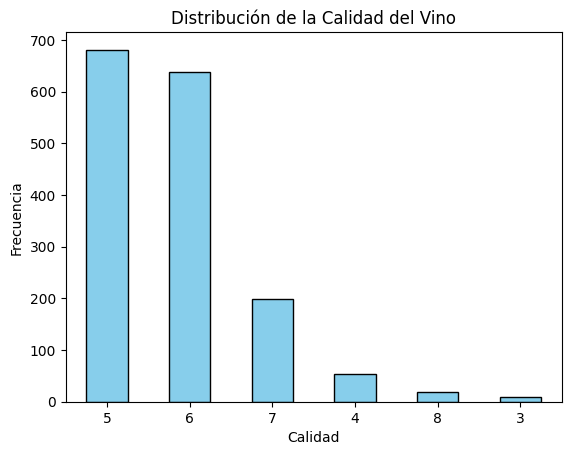

In [7]:
df['quality'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

In [8]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

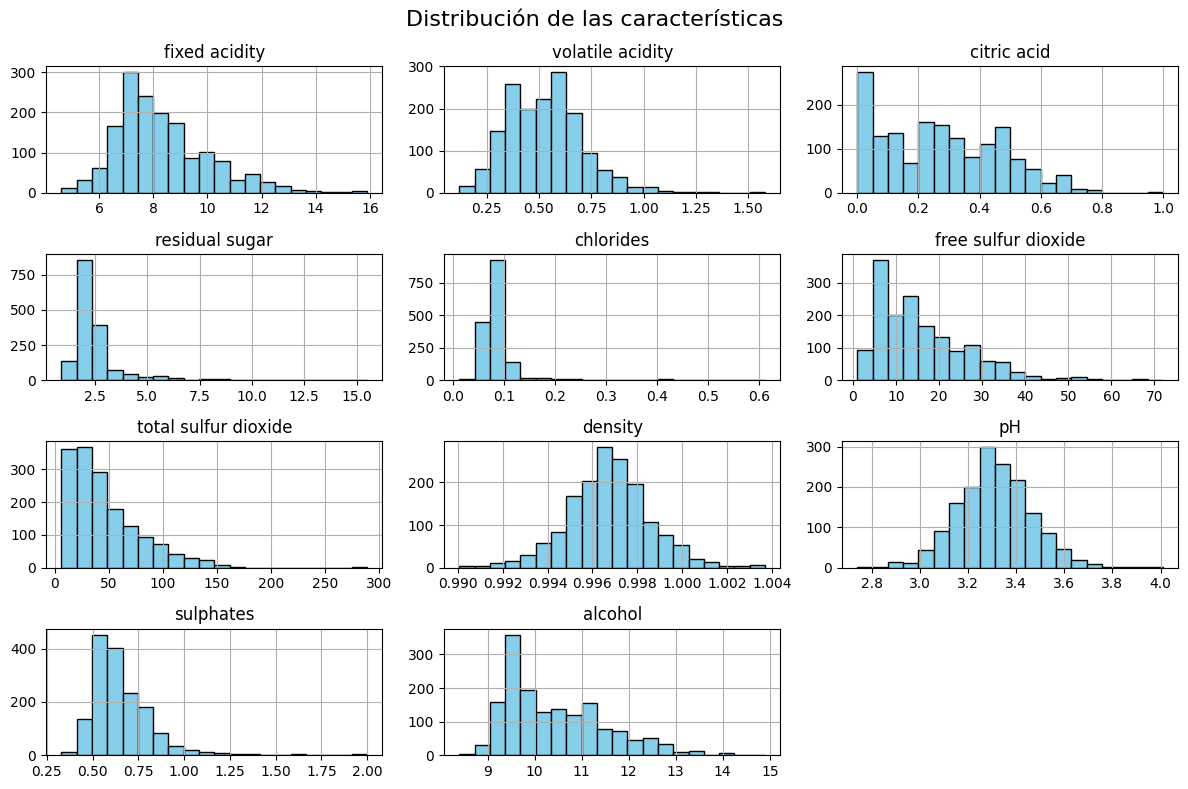

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [9]:
df.drop('quality', axis=1).hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de las características", fontsize=16)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 8))

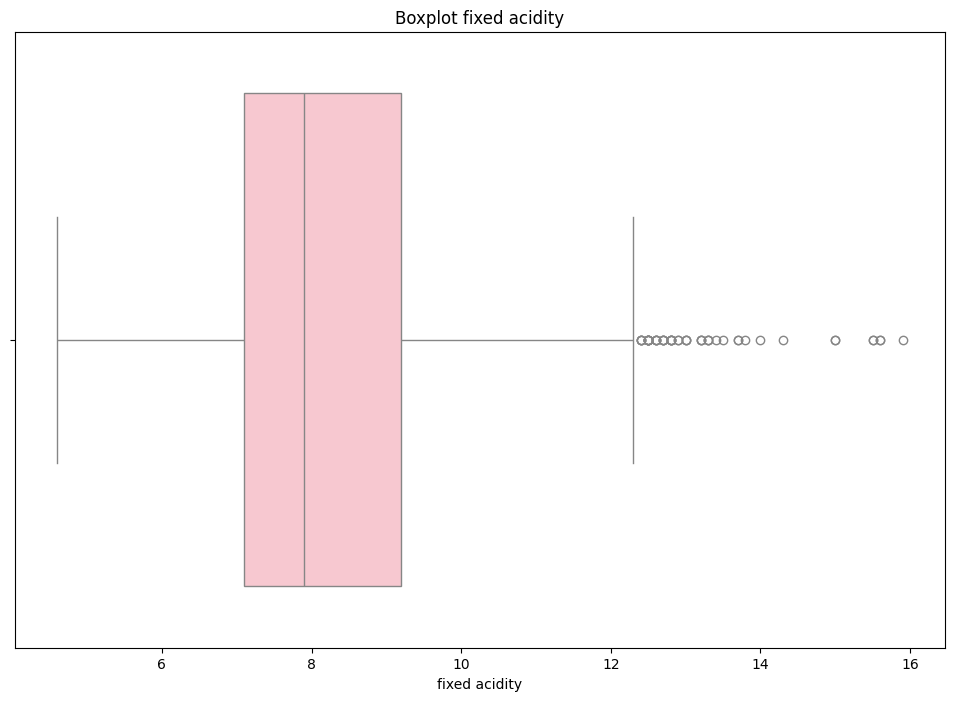

In [10]:
plt.figure(figsize=(12, 8))

sns.boxplot(x=df['fixed acidity'], color='pink')
plt.title('Boxplot fixed acidity')
plt.show()

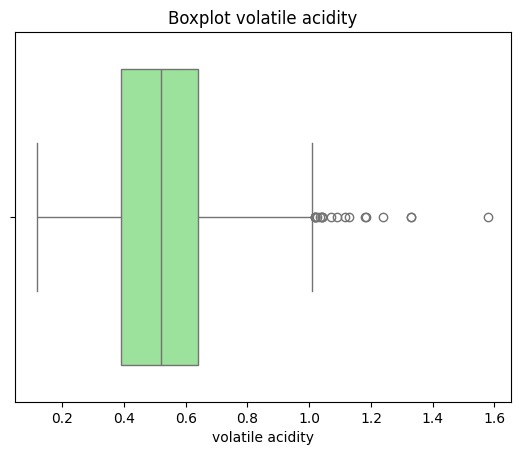

In [11]:
sns.boxplot(x=df['volatile acidity'], color='lightgreen')
plt.title('Boxplot volatile acidity')
plt.show()

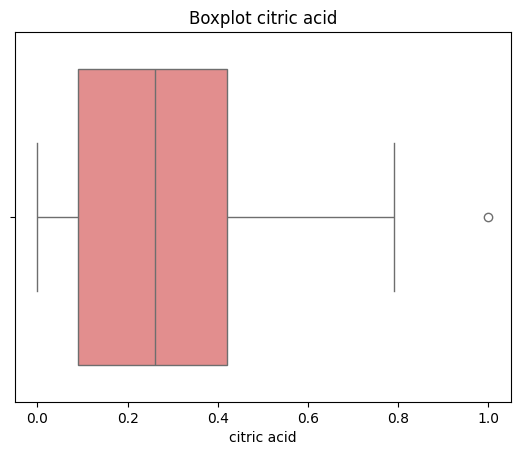

In [12]:
sns.boxplot(x=df['citric acid'], color='lightcoral')
plt.title('Boxplot citric acid')
plt.show()

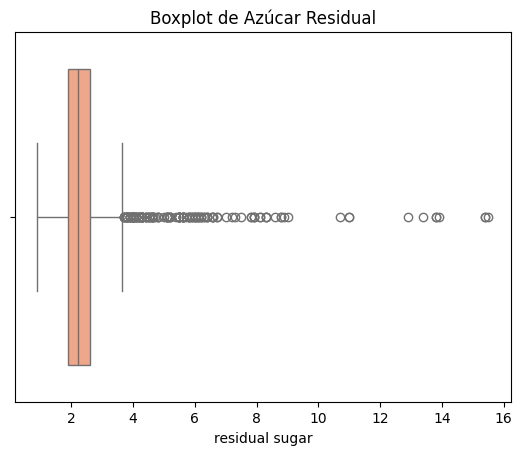

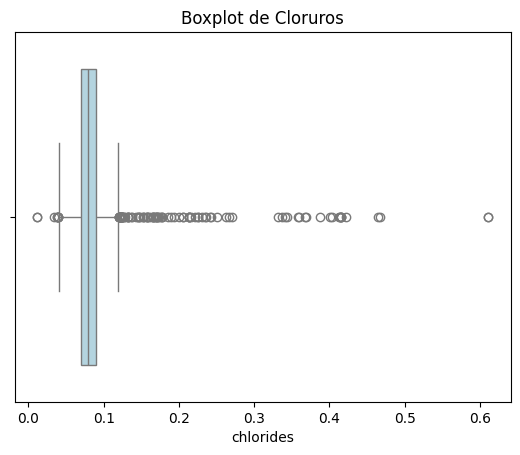

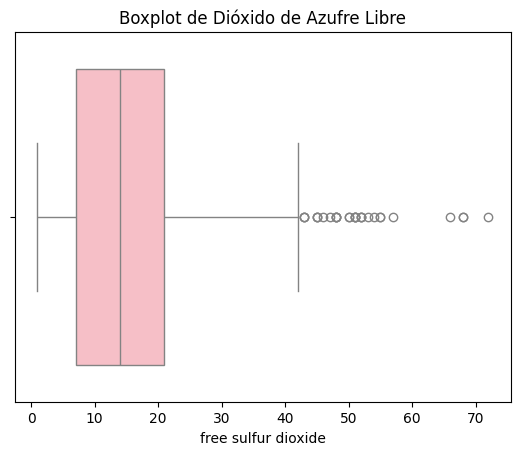

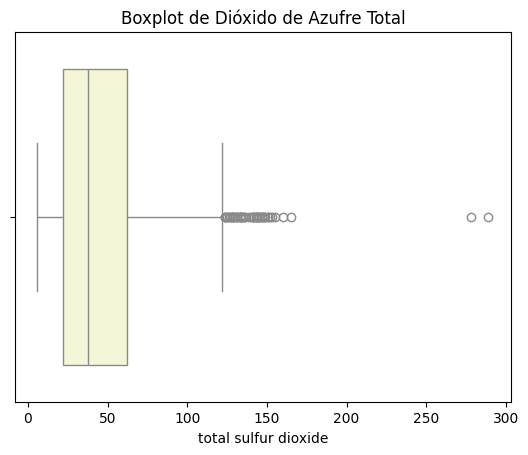

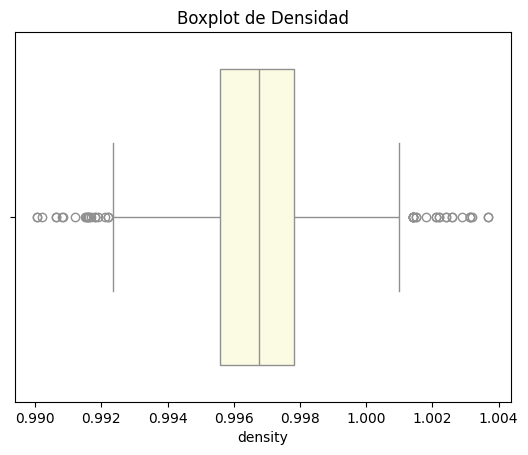

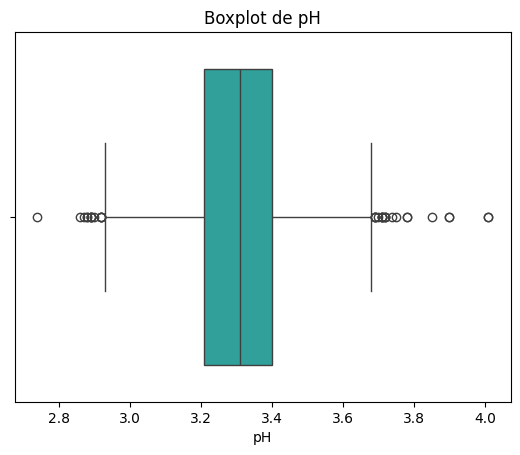

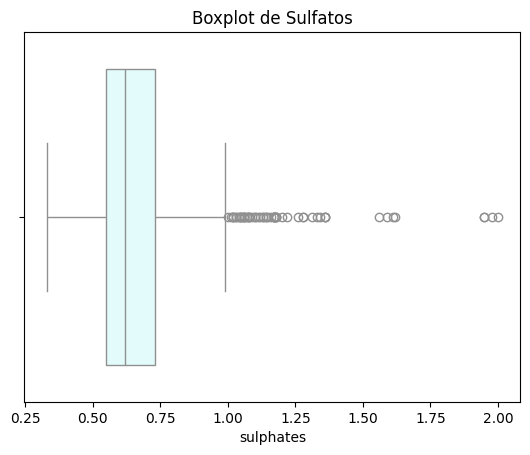

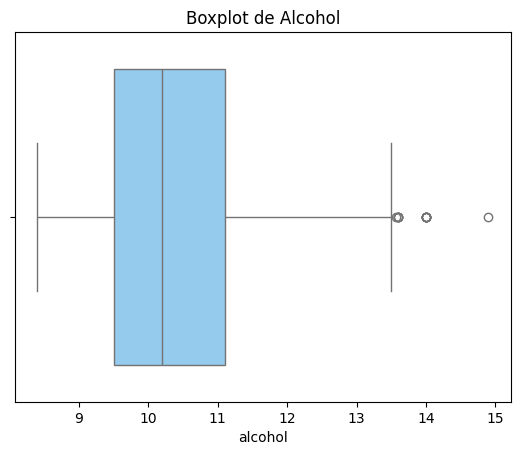

<Figure size 640x480 with 0 Axes>

In [13]:
sns.boxplot(x=df['residual sugar'], color='lightsalmon')
plt.title('Boxplot de Azúcar Residual')
plt.show()

sns.boxplot(x=df['chlorides'], color='lightblue')
plt.title('Boxplot de Cloruros')
plt.show()

sns.boxplot(x=df['free sulfur dioxide'], color='lightpink')
plt.title('Boxplot de Dióxido de Azufre Libre')
plt.show()

sns.boxplot(x=df['total sulfur dioxide'], color='lightgoldenrodyellow')
plt.title('Boxplot de Dióxido de Azufre Total')
plt.show()

sns.boxplot(x=df['density'], color='lightyellow')
plt.title('Boxplot de Densidad')
plt.show()

sns.boxplot(x=df['pH'], color='lightseagreen')
plt.title('Boxplot de pH')
plt.show()

sns.boxplot(x=df['sulphates'], color='lightcyan')
plt.title('Boxplot de Sulfatos')
plt.show()

sns.boxplot(x=df['alcohol'], color='lightskyblue')
plt.title('Boxplot de Alcohol')
plt.show()

plt.tight_layout()

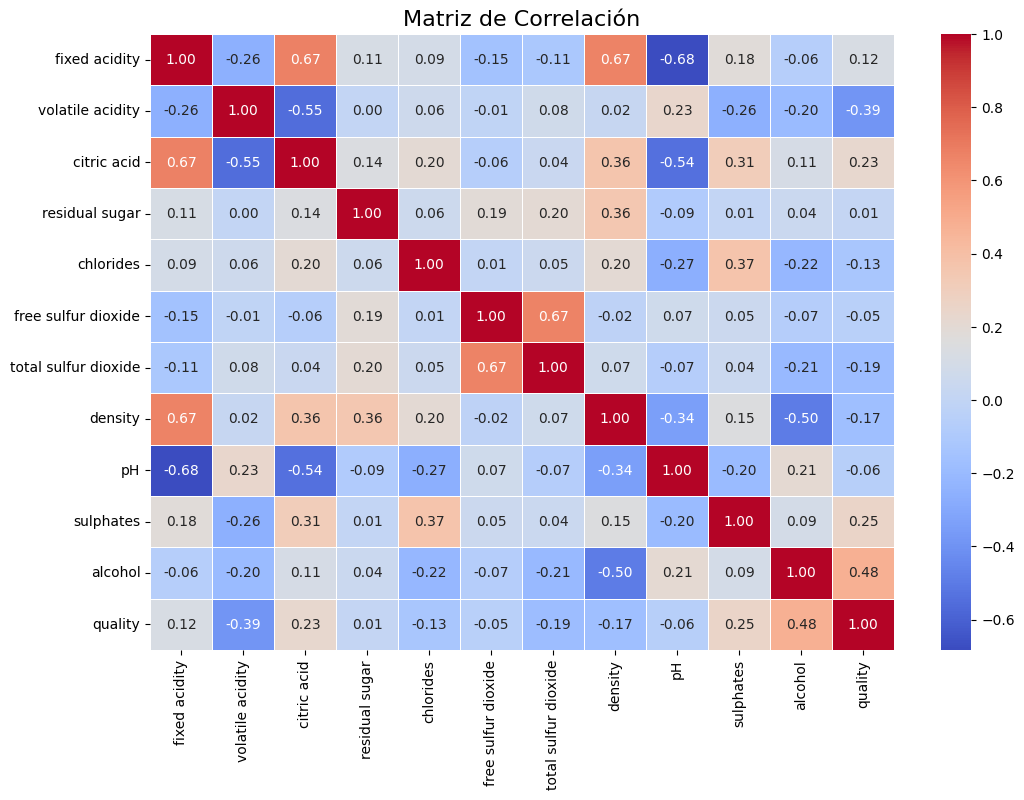

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

In [15]:
correlation_with_quality = df.corr()['quality'].drop('quality')

# Seleccionar variables con |correlación| > 0.2
relevant_features = correlation_with_quality[correlation_with_quality.abs() > 0.2]
print("Variables más correlacionadas con quality:\n", relevant_features)

Variables más correlacionadas con quality:
 volatile acidity   -0.390558
citric acid         0.226373
sulphates           0.251397
alcohol             0.476166
Name: quality, dtype: float64


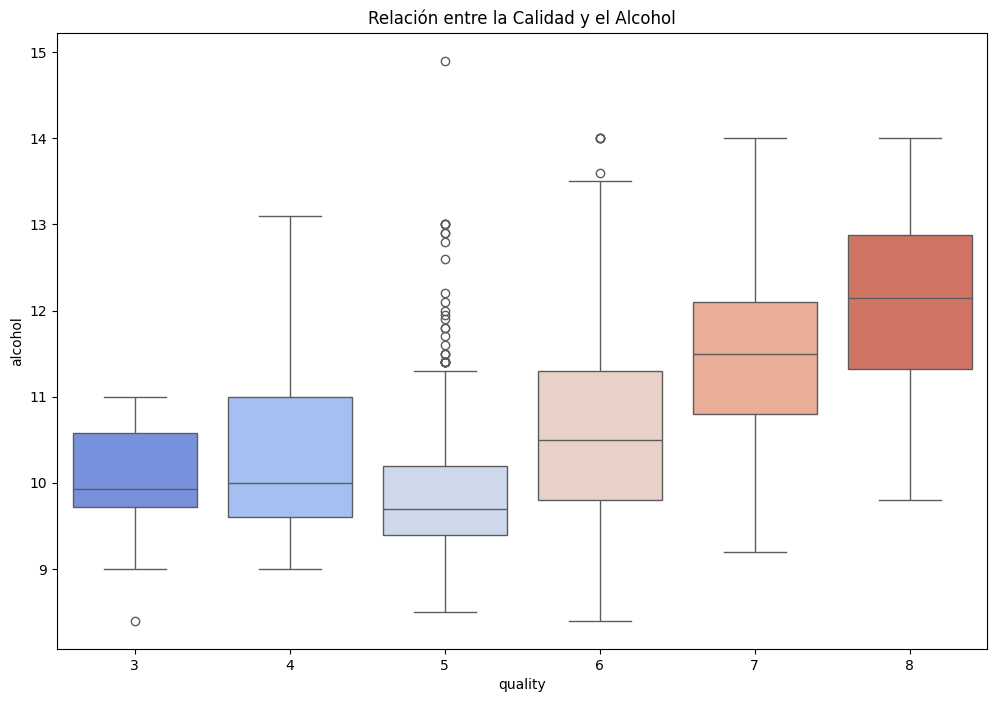

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='alcohol', data=df, palette='coolwarm')
plt.title('Relación entre la Calidad y el Alcohol')
plt.show()

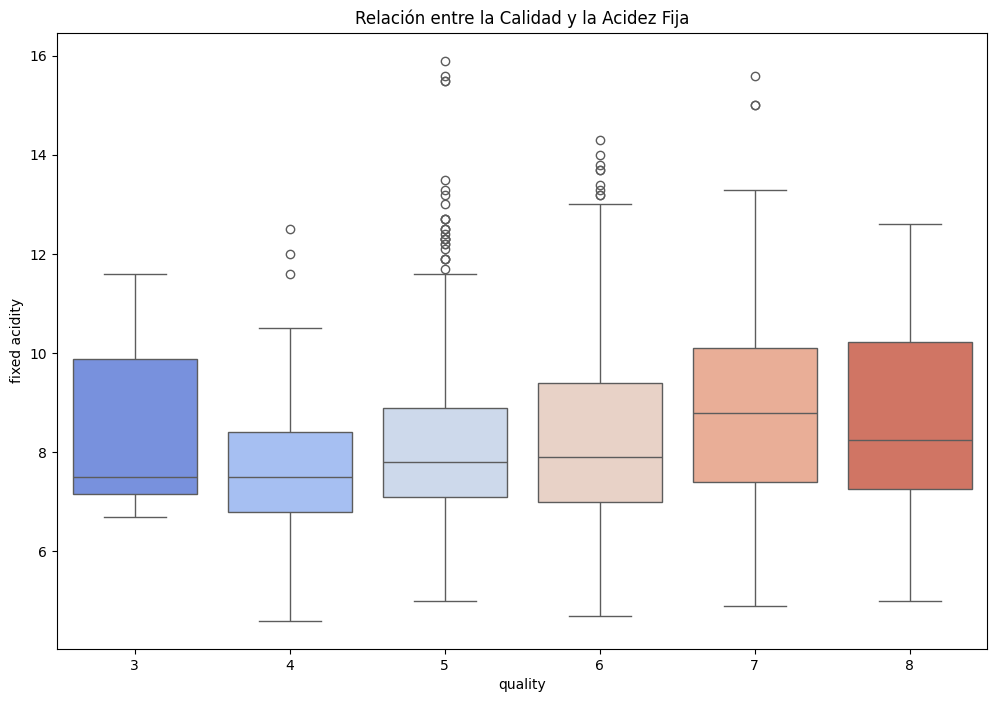

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='fixed acidity', data=df, palette='coolwarm')
plt.title('Relación entre la Calidad y la Acidez Fija')
plt.show()

Transformación logarítmica de variables.

In [18]:
df['residual_sugar'] = np.log1p(df['residual sugar'])
df['chlorides'] = np.log1p(df['chlorides'])
df['density'] = np.log1p(df['density'])
df.drop(columns=['residual sugar'], inplace=True, errors='ignore')

X = df.drop('quality', axis=1)

Elegimos las variables más correlacionadas con la variable objetivo y eliminamos el resto :)

In [19]:
features = ['alcohol', 'sulphates', 'citric acid', 'volatile acidity']

Clasificación de la variable objetivo en tres grupos.

In [20]:
def classify_quality(quality):
    if quality <= 4:
        return 'Baja'
    elif 5 <= quality <= 6:
        return 'Media'
    else:
        return 'Alta'
    
df['quality'] = df['quality'].apply(classify_quality)

Separamos la variable objetivo y las características

In [21]:
X = df[features]

y = df['quality']


Normalización de caracterísiticas

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Split entrenamiento y prueba 80-20

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Construcción del modelo

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Predicción y evaluación del modelo

In [25]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy:.4f}')
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

Accuracy del modelo: 0.8281
Matriz de confusión:
[[ 21   0  26]
 [  0   2   9]
 [ 19   1 242]]

Informe de clasificación:
              precision    recall  f1-score   support

        Alta       0.53      0.45      0.48        47
        Baja       0.67      0.18      0.29        11
       Media       0.87      0.92      0.90       262

    accuracy                           0.83       320
   macro avg       0.69      0.52      0.56       320
weighted avg       0.82      0.83      0.82       320



Evaluación de los valores K

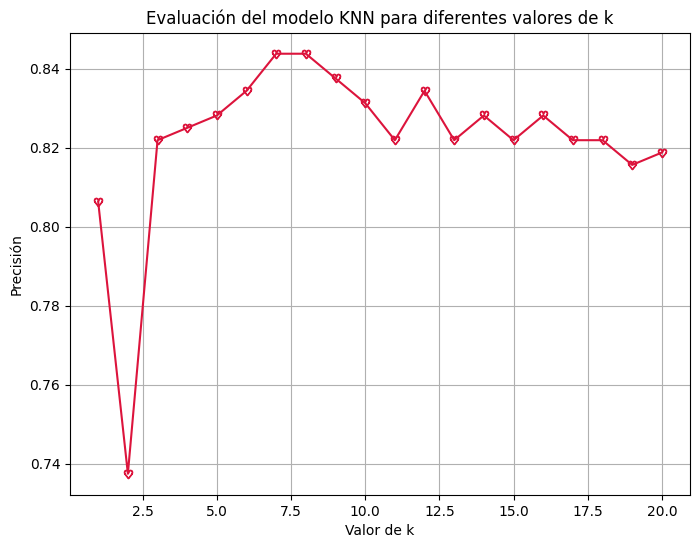

In [26]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  
    y_pred = knn.predict(X_test)  
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='$♡$', linestyle='-', color='crimson')
plt.title('Evaluación del modelo KNN para diferentes valores de k')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

In [27]:
def predict_wine_quality(features):
    features_scaled = scaler.transform([features])
    pred = knn.predict(features_scaled)[0]
    if pred == 0:
        return "Este vino probablemente sea de baja calidad 🍷"
    elif pred == 1:
        return "Este vino probablemente sea de calidad media 🍷"
    else:
        return "Este vino probablemente sea de alta calidad 🍷"


In [30]:
def predict_wine_quality(features):
    features_scaled = scaler.transform([features])
    pred = knn.predict(features_scaled)[0]
    return f"Este vino probablemente sea de calidad {pred} 🍷, 乾杯!"

resultado = predict_wine_quality([9.4, 0.56, 0.0, 0.7])
print("\nPrediction:", resultado)


Prediction: Este vino probablemente sea de calidad Media 🍷, 乾杯!
